## In this project we have to do sentiment analysis of the tweets from the twitter dataset

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
!ls

test.csv  train.csv  twitter_sentiment_analysis.ipynb


## Reading the tweets file

In [3]:
tweets=pd.read_csv('train.csv', encoding = "ISO-8859-1")

In [4]:
tweets.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [5]:
tweets.drop(['ItemID'], axis=1, inplace=True)

In [6]:
tweets.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [7]:
tweets.shape

(99989, 2)

## cleaning the dataset 

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 10000):
    review = re.sub('[^a-zA-Z]', ' ', tweets['SentimentText'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = tweets.iloc[:10000, 0].values

In [11]:
len(X)

10000

In [12]:
y.shape

(10000,)

## Train test split of data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## using random forest algorithm

In [14]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, n_jobs=-1)
%time Classifier.fit(X_train, y_train)

CPU times: user 3min 58s, sys: 386 ms, total: 3min 58s
Wall time: 1min


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
y_pred=Classifier.predict(X_test)

## Model evaluation using confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[997, 207],
       [284, 512]])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(Classifier, X, y, cv=10, scoring='roc_auc').mean()

In [1]:
import matplotlib.pyplot as plt

## using sentimentIntensityAnalyzer library of nltk

In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.SentimentText.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.SentimentText.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.SentimentText.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.SentimentText.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/beast/nltk_data...


,Sentiment,SentimentText,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,0,is so sad for my APL frie...,-0.5256,0.639,0.361,0.0,NEGATIVE
1,0,I missed the New Moon trail...,-0.2960,0.645,0.355,0.0,NEGATIVE
2,1,omg its already 7:30 :O,-0.2808,0.652,0.348,0.0,NEGATIVE
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,-0.4767,0.871,0.129,0.0,NEGATIVE
4,0,i think mi bf is cheating on me!!! ...,-0.6679,0.610,0.390,0.0,NEGATIVE


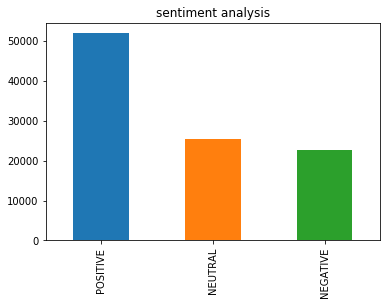

In [10]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")